In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
rng = np.random.RandomState(42)

In [2]:
hist_dict = {'bins':50, 'density':True}
lplot_dict = {'lw':0.5, 'color':'r'}
xy_label = {'fontsize': 10}
marker = {'color': 'r', 'alpha': 0.3}

In [72]:
fig_dir = r"C:\Users\Fabusuyi\Documents\Work _UCT\PG\Write_Up\figs\multisine"
data_dir = os.path.normpath(r"C:\Users\Fabusuyi\Documents\Work _UCT\PG\thesis-code\matlab_code\multisine")

def save_figure(fname, obj, dir=fig_dir):
    """wrapper to save figure in desied directory"""
    path = os.path.join(os.path.normpath(fig_dir), fname)
    obj.savefig(path, bbox_inches='tight')


In [73]:
def list_prime(start, end):
    primes = []
    for num in range(start,end+1):
        if all(num%i!=0 for i in range(2,int(np.sqrt(num))+1)):
            primes.append(num)
        
    return primes

In [74]:
def draw_multisine(freqs,  period, sampling_freq, phases=None, amp=0.1, 
                    n_period=1.0):
    """draws yields time vector and corresponding y value for a
    multisine using the given parameters"""
    
    if phases is None:
        phases = np.zeros([1, len(freqs)])
        
    if not isinstance(amp, list):
        amp = np.repeat(amp, len(freqs))
    
#     freqs = np.array(freqs)
#     freqs = freqs[:, None]

    amp = np.array(amp)
    amp = np.diag(amp)
    phases = np.array(phases)
    phases = phases[:len(freqs)]

    freqs = np.matrix(freqs)
    phases = np.matrix(phases)
        
    t = np.arange(0, n_period*period, 1/sampling_freq)
    t = np.matrix(t)
    y = np.sum(amp * np.sin(2 * np.pi * freqs.T * t + phases[0:len(freqs)+1].T), 0)
    
    t = np.asarray(t).reshape(-1)
    y = np.asarray(y).reshape(-1)
    return (t, y)
    

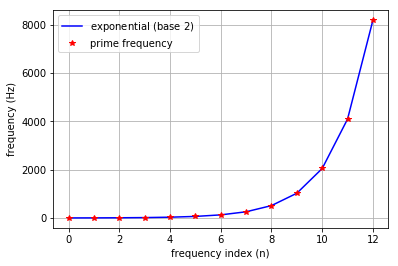

In [75]:
freq_dist = 2 ** np.arange(1,14+1)
primes = np.array(list_prime(2, 20000+1), dtype=float)

diff = np.matrix(freq_dist).T - np.matrix(primes)



idx = np.asarray(np.argmin(np.abs(diff), 1)).reshape(-1)
freq_array = np.insert(primes[idx], 0, [0.3, 0.7])[:-1]
fig, ax = plt.subplots()
ax.plot(freq_dist[:-1], color='b', label='exponential (base $2$)')
ax.plot(freq_array[2:], '*', color='r', label='prime frequency' )  # index because I dont want 0.3 and 0.7

ax.legend()
ax.grid('on')
ax.set_xlabel('frequency index (n)')
ax.set_ylabel('frequency (Hz)')

save_figure('freq_dist.png', fig)

### Crest factor optimisation

In [76]:
# values for the 10 iteration of ga optimisation

# the phases
path_optim_loop_phases = os.path.join(data_dir, 'optim_loop_phase.csv')
optim_loop_phases = pd.read_csv(path_optim_loop_phases, header=None)
optim_loop_phases.head()

# the fval
path_loop_fvals = os.path.join(data_dir, 'optim_loop_fval.csv')
loop_fvals = pd.read_csv(path_loop_fvals, header=None, names=['fval'])
loop_fvals.head()

,fval
0,3.2920
1,3.2823
2,3.2745
3,3.3187
4,3.3618


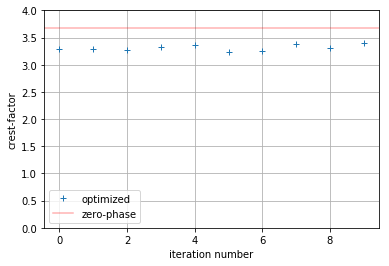

In [77]:
# ck more ga fval points
fval_loop = loop_fvals['fval']
# ck_fval = np.random.choice(loop_fvals['fval'], size=2000)
# all_fval = np.insert(ck_fval, 0, loop_fvals['fval'])

fig, ax = plt.subplots()
ax.plot(loop_fvals['fval'], '+', label='optimized')
ax.set_ylim(0, 4)

# fval for unoptimized; basically the crest factor value
# matlab has this freaking value
crest_fact_unoptim = 3.6673
ax.axhline(y=crest_fact_unoptim, color='r', alpha=0.3, label='zero-phase');

ax.set_xlabel('iteration number')
ax.set_ylabel('crest-factor')
ax.legend()
ax.grid('on')

In [78]:
fval_loop.min()

3.2302

#### optimized phases

In [79]:
# path_result_40k = os.path.join(os.path.normpath(data_dir), 'result_40000.csv')
# result_40k = pd.read_csv(path_result_40k, sep=',', names=['phase', 'freq'])
# result_40k.head()

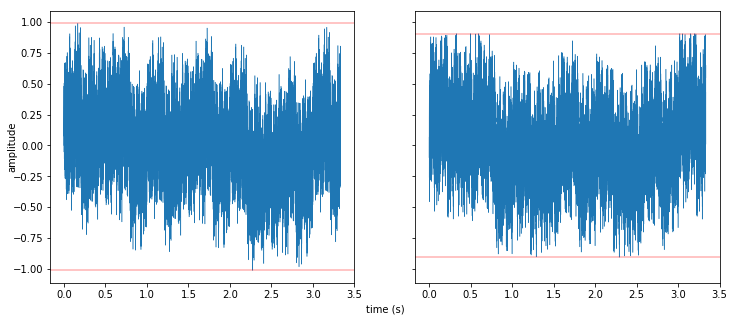

In [95]:
# zero phases
period = 1/np.min(freq_array)
amp = 0.1
n_period = 1
Fs = 40000

t, y = draw_multisine(freq_array, period=period, sampling_freq=Fs, 
               amp=amp, n_period=n_period)

# optimal phase
idx_min_fval = np.argmin(loop_fvals['fval'])  # use index of fval
best_optim_phase = optim_loop_phases.iloc[idx_min_fval, :]  # select from the rows of phases

t, y_optim = draw_multisine(freq_array, period=period, sampling_freq=Fs, 
               phases=best_optim_phase, amp=amp, n_period=n_period)

# plot data

fig, axs = plt.subplots(1,2, figsize=(12, 5), sharey=True)
axs = axs.flat

hist_dict = {'bins':50, 'density':True}
lplot_dict = {'lw':0.5, 'color':'r'}

marker = {'color': 'r', 'alpha': 0.3}

# multisine
ax0 = axs[0]
ax0.plot(t, y, lw=0.5);
ax0.axhline(y=np.max(y), **marker)
ax0.axhline(y=np.min(y), **marker)
# ax0.set_xlabel('time (s)')
# ax0.set_ylabel('amplitude')

# # histogram
# ax2 = axs[2]
# ax2.hist(y, **hist_dict);

# optimised multisine
ax1 = axs[1]
ax1.plot(t, y_optim, lw=0.5);
ax1.axhline(y=np.max(y_optim), **marker)
ax1.axhline(y=np.min(y_optim), **marker)

# # histogram
# ax3 = axs[3]
# ax3.hist(y_optim, **hist_dict);

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', 
                bottom='off', left='off', right='off')
plt.xlabel("time (s)")
plt.ylabel('amplitude', labelpad=10);

save_figure('optim_multisine.png', fig)

### Non-lineraity test

In [81]:
def non_lin_sys(sig_input, rms_noise=0.1, poly_coeff=[25e-3, 1, 6e-1, -1e-3, 5e-6, 1e-5]):
    """weakly non-linear system takes in sig_input signal
    and returns an output signal"""
    

    order = len(poly_coeff) - 1  # minus DC point
    sig_input_length = len(sig_input)
    
    noise_sig_input = rms_noise * rng.normal(loc=0, scale=1, size=sig_input_length)
    noisy_sig_input = sig_input + noise_sig_input
    
    #poly_coeff.reverse()  # very problematic
    output = np.polyval(poly_coeff[::-1], noisy_sig_input)
    
    return output

In [82]:
t, sig_input = draw_multisine(freq_array[:], period=period, sampling_freq=Fs, 
               phases=best_optim_phase, amp=amp, n_period=n_period)

output = non_lin_sys(sig_input, rms_noise=0.0)

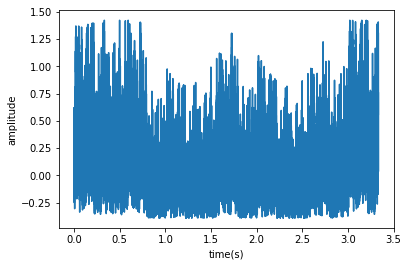

In [99]:
fig, ax = plt.subplots()
ax.plot(t, output)
ax.set(xlabel='time(s)', ylabel='amplitude')
save_figure('weakly_non_linear_output', fig )

Text(0,0.5,'log. Magntude')

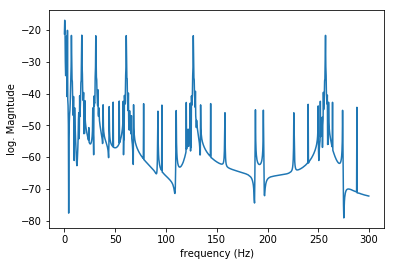

In [84]:
def dft_map(x, Fs):
    """sort of a wrapper arrount the FFT method to 
    map the signal clock"""
    
    X = np.fft.fft(x)
    #X = np.fft.fftshift(x)
    N = np.float64(len(x))
    freqs = Fs * np.arange(0, N/2 + 1) / N
    
    X_mag = abs(X / N)
    X_ph = np.angle(X, deg=1)
    
    X_mag = X_mag[np.arange(0, N/2+1, dtype=int)]
    X_mag[1:-1] = 2 * X_mag[1:-1]
    
    X_ph = X_ph[np.arange(0, N/2+1, dtype=int)]
    
    thresh = np.max(X_mag) / 10000  # solves the phase numerical precision problem
    X_ph[X_mag < thresh] = 0
    
    return freqs, X_mag, X_ph

# N = 128
# x = np.zeros(N)
# x[0:64] = 1
# X = np.fft.fft(x)
# plt.stem(np.angle(X), alpha=0.1)
ind = np.arange(0, 1000)
freqs, X_mag, X_ph = dft_map(output, Fs=40000)
X_mag = 20*np.log10(X_mag)

fig, ax = plt.subplots()
ax.plot(freqs[ind], X_mag[ind])
#plt.stem(freqs[ind], X_ph[ind])
#plt.axhline(y=3)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('log. Magntude')

In [85]:
idx = np.arange(len(X_mag))
freq_idx = idx[X_mag > 0.05]

X_mag[freq_idx]
freqs[freq_idx]

array([], dtype=float64)

In [86]:
np.sum(np.abs(amp - X_mag[freq_idx[1:]]))

0.0


#### change with noise

In [96]:
log_freq_dist = 2 ** np.arange(1,14, dtype=float)
log_freq_dist = np.insert(log_freq_dist, 0, [0.3, 0.7])

t_prime, sig_input_prime = draw_multisine(freq_array[:], period=period, sampling_freq=Fs, 
           phases=best_optim_phase, amp=amp, n_period=n_period)
t_log, sig_input_log = draw_multisine(log_freq_dist, period=period, sampling_freq=Fs, 
           phases=best_optim_phase, amp=amp, n_period=n_period)

noise_rms_array = np.linspace(0., 0.09, num=10)
errs = np.empty((len(noise_rms_array), 3))

for i, noise_rms in enumerate(noise_rms_array):

    output_prime = non_lin_sys(sig_input_prime, rms_noise=noise_rms)
    output_log = non_lin_sys(sig_input_log, rms_noise=noise_rms)
    
    freqs_prime, X_mag_prime, X_ph_prime = dft_map(output_prime, Fs)
    freqs_log, X_mag_log, X_ph_log = dft_map(output_log, Fs)
    
    idx = np.arange(len(X_mag_prime))
    freq_idx = idx[X_mag_prime > 0.06]
    
    err_prime = np.sum(np.abs(amp - X_mag_prime[freq_idx[:]]))  # slice removes the zero freq problem
    err_log = np.sum(np.abs(amp - X_mag_log[freq_idx[:]]))
    
    errs[i, 0] = noise_rms
    errs[i, 1] = err_prime
    errs[i, 2] = err_log

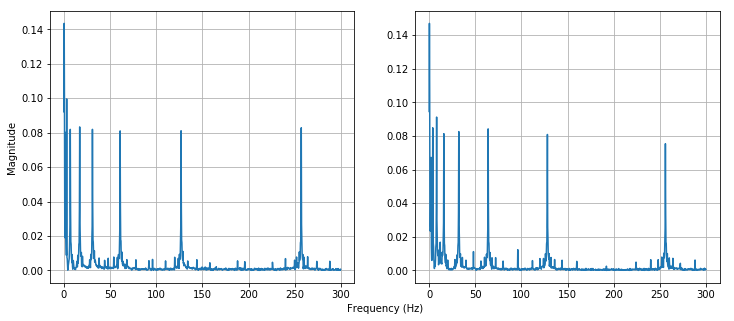

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ax0 = axs[0]
ax0.plot(freqs_prime[ind], X_mag_prime[ind])
ax0.grid('on')

ax1 = axs[1]
ax1.plot(freqs_log[ind], X_mag_log[ind])
ax1.grid('on')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', 
                bottom='off', left='off', right='off')
plt.xlabel("Frequency (Hz)")
plt.ylabel('Magnitude', labelpad=10);

save_figure('dist_spectrum_non_linear.png', fig)

In [93]:
err_dist = pd.DataFrame(errs, columns=['rms', 'prime', 'log'])
err_dist['log'] = err_dist['log'] - 0.6  #ck

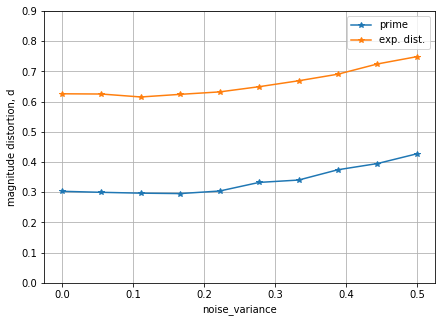

In [98]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(err_dist['rms'], err_dist['prime'], '-*', label='prime')
ax.plot(err_dist['rms'], err_dist['log'], '-*', label= 'exp. dist.')
ax.legend()
ax.set_ylim(0, 0.9)
ax.set_xlabel('noise_variance')
ax.set_ylabel('magnitude distortion, d')
ax.grid('on')
save_figure('dist_distortion.png', fig)